In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MissingValues_2 import remove_missing_values
from outliers import countOutliers
from outliers import removeOutliers

In [42]:
def plot_freq(minFreq,maxFreq, pattern, title, width=10, height=6):
    for i in range(minFreq,maxFreq):
        freq=[]
        p=[]
        for c in pattern:
            if(len(c[0])==i):
                freq.append(c[1])
                p.append(c[0])
        indices = np.arange(len(p))
        plt.figure(figsize=(width,height))
        plt.bar(indices, freq, color='r')
        plt.xticks(indices, p, rotation='vertical')
        plt.tight_layout()
        plt.title(title+str(i))
        
        plt.show()

In [2]:
#load dataset into a dataframe
credit_cards = pd.read_csv("credit_default_train.csv")
remove_missing_values(credit_cards)
data=removeOutliers(credit_cards)

Number of rows to be dropped:  30
size:  9970


In [3]:
import pickle
freq=pickle.load(open('freq_patt_dict_NEW.pkl','rb'))

In [17]:
freq.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [18]:
freq[2].keys()

dict_keys(['a', 'c', 'm'])

In [19]:
freq[2]['a'].keys()

dict_keys([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [56]:
# 2 --> numero minimo di item
# a --> 'all'
# 15 --> min_sup
pat=freq[2]['a'][40]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if('no' in f_p):
        credit.append(pat[i])
    

In [57]:
len(credit)

86

In [62]:
def takeSecond(elem):
    return elem[1]
credit.sort(key=takeSecond,reverse=True)

In [63]:
credit

[(('no', '[1.0, 21535.2)_pa-sep'), 6261, 0.6279839518555667),
 (('no', '[1.0, 25876.0)_pa-aug'), 6213, 0.6231695085255767),
 (('[1.0, 27840.133)_pa-jul', 'no'), 6140, 0.6158475426278837),
 (('[1.0, 19531.733)_pa-jun', 'no'), 5923, 0.5940822467402207),
 (('[1.0, 20235.067)_pa-may', 'no'), 5859, 0.5876629889669007),
 (('[1.0, 29534.333)_pa-apr', 'no'), 5765, 0.578234704112337),
 (('no', '[1.0, 21535.2)_pa-sep', '[1.0, 25876.0)_pa-aug'),
  5452,
  0.5468405215646941),
 (('[1.0, 27840.133)_pa-jul', 'no', '[1.0, 25876.0)_pa-aug'),
  5420,
  0.5436308926780341),
 (('[1.0, 27840.133)_pa-jul', 'no', '[1.0, 21535.2)_pa-sep'),
  5388,
  0.5404212637913741),
 (('[1.0, 19531.733)_pa-jun', 'no', '[1.0, 25876.0)_pa-aug'),
  5219,
  0.5234704112337011),
 (('[1.0, 19531.733)_pa-jun', '[1.0, 27840.133)_pa-jul', 'no'),
  5210,
  0.522567703109328),
 (('[1.0, 19531.733)_pa-jun', 'no', '[1.0, 21535.2)_pa-sep'),
  5174,
  0.5189568706118355),
 (('[1.0, 20235.067)_pa-may', '[1.0, 27840.133)_pa-jul', 'no'),


In [20]:
data_bin=pd.read_csv('credit_default_binned.csv')

In [65]:
data_bin.head()

,credit_default,sex,education,status,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,...,ba-augBin,ba-sepBin,pa-aprBin,pa-mayBin,pa-junBin,pa-julBin,pa-augBin,pa-sepBin,ageBin,limitBin
0,no,male,graduate school,single,2_ps-sep,0_ps-aug,0_ps-jul,0_ps-jun,0_ps-may,0_ps-apr,...,"[30300.0, 60597.0)_ba-aug","[30695.85, 61388.7)_ba-sep","[1.0, 29534.333)_pa-apr","[1.0, 20235.067)_pa-may","[1.0, 19531.733)_pa-jun","[1.0, 27840.133)_pa-jul","[1.0, 25876.0)_pa-aug","[1.0, 21535.2)_pa-sep","[21.0, 34.5)_age","[10000.0, 202500.0)_limit"
1,no,male,university,married,-1_ps-sep,-1_ps-aug,-1_ps-jul,-1_ps-jun,-1_ps-may,-1_ps-apr,...,"[3.0, 30300.0)_ba-aug","[3.0, 30695.85)_ba-sep","[1.0, 29534.333)_pa-apr","[1.0, 20235.067)_pa-may","[1.0, 19531.733)_pa-jun","[1.0, 27840.133)_pa-jul","[1.0, 25876.0)_pa-aug","[1.0, 21535.2)_pa-sep","[48.0, 61.5)_age","[10000.0, 202500.0)_limit"
2,no,female,high school,married,2_ps-sep,3_ps-aug,2_ps-jul,2_ps-jun,2_ps-may,0_ps-apr,...,"[3.0, 30300.0)_ba-aug","[3.0, 30695.85)_ba-sep","[1.0, 29534.333)_pa-apr","[1.0, 20235.067)_pa-may","[1.0, 19531.733)_pa-jun","[1.0, 27840.133)_pa-jul","[1.0, 25876.0)_pa-aug",0_pa-sep,"[34.5, 48.0)_age","[10000.0, 202500.0)_limit"
3,no,female,university,single,0_ps-sep,0_ps-aug,0_ps-jul,0_ps-jun,0_ps-may,0_ps-apr,...,"[30300.0, 60597.0)_ba-aug","[30695.85, 61388.7)_ba-sep","[1.0, 29534.333)_pa-apr","[1.0, 20235.067)_pa-may","[1.0, 19531.733)_pa-jun","[1.0, 27840.133)_pa-jul","[1.0, 25876.0)_pa-aug","[1.0, 21535.2)_pa-sep","[21.0, 34.5)_age","[10000.0, 202500.0)_limit"
4,yes,female,high school,married,1_ps-sep,2_ps-aug,2_ps-jul,0_ps-jun,0_ps-may,0_ps-apr,...,"[30300.0, 60597.0)_ba-aug","[30695.85, 61388.7)_ba-sep",0_pa-apr,"[1.0, 20235.067)_pa-may","[1.0, 19531.733)_pa-jun","[1.0, 27840.133)_pa-jul",0_pa-aug,"[1.0, 21535.2)_pa-sep","[34.5, 48.0)_age","[10000.0, 202500.0)_limit"


C:\Users\madda\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


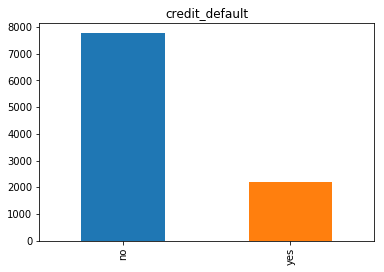

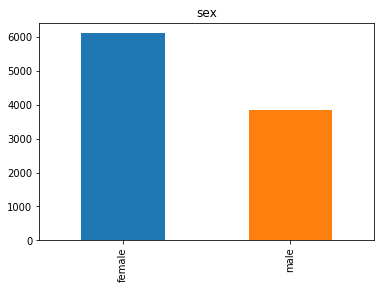

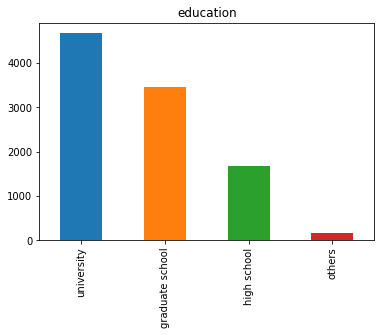

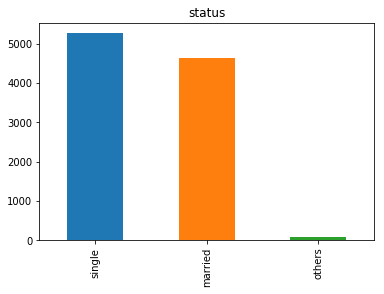

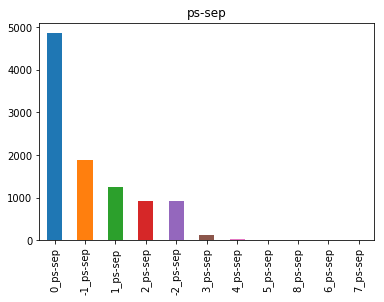

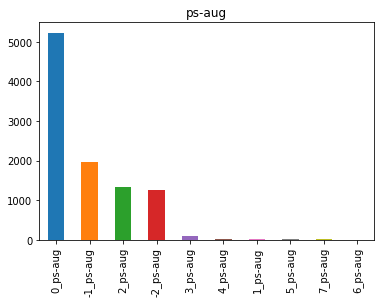

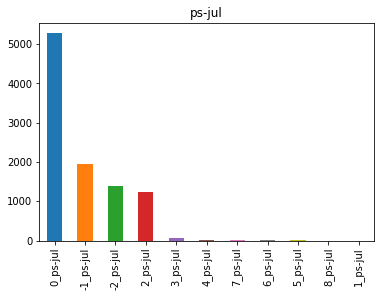

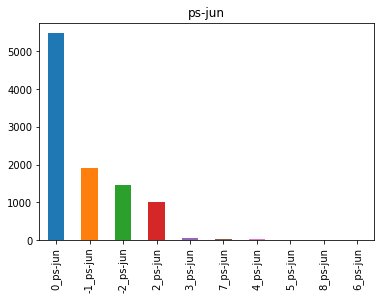

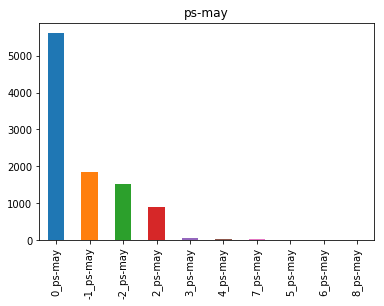

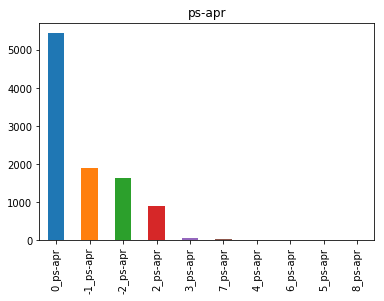

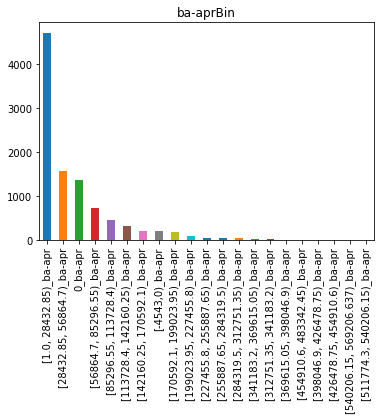

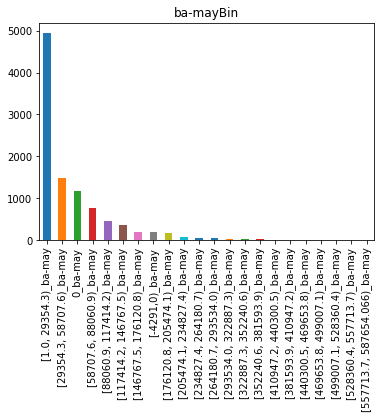

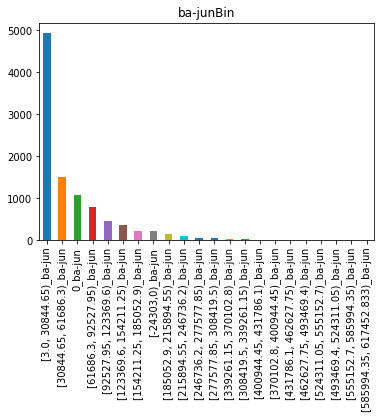

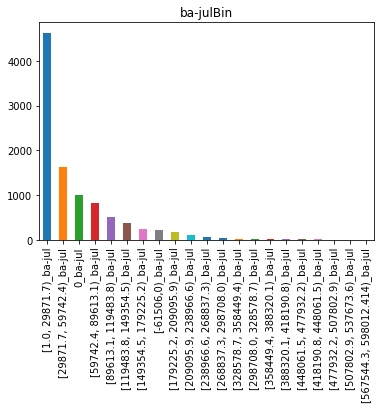

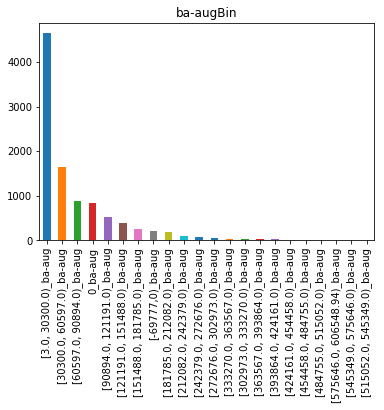

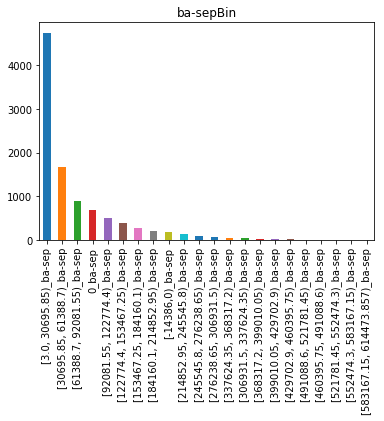

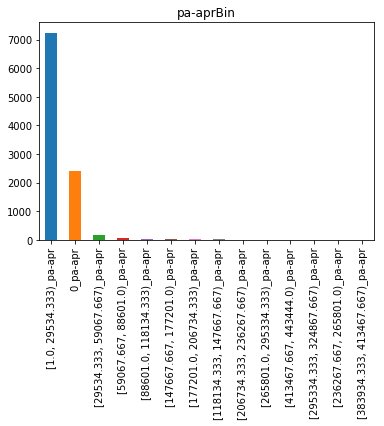

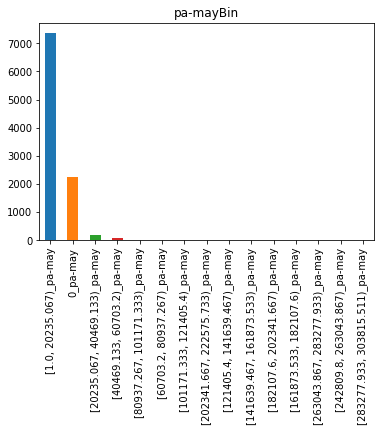

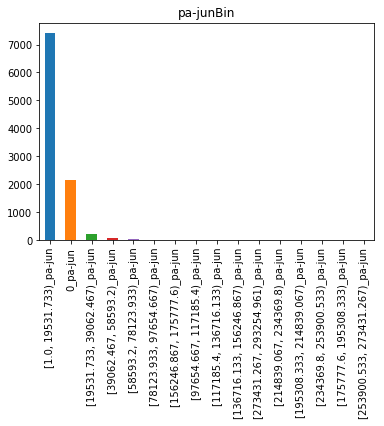

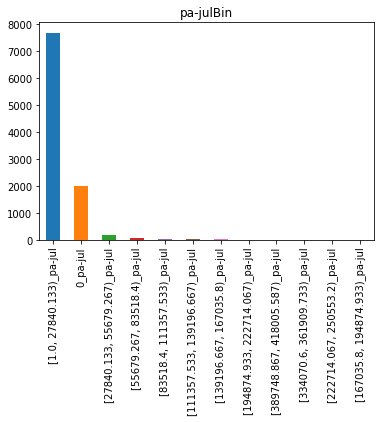

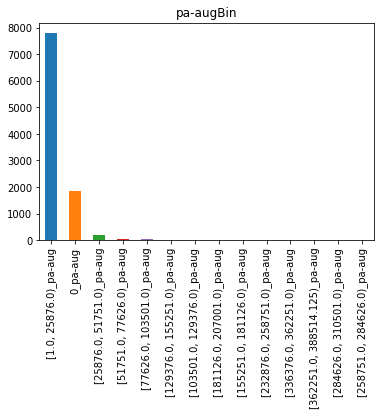

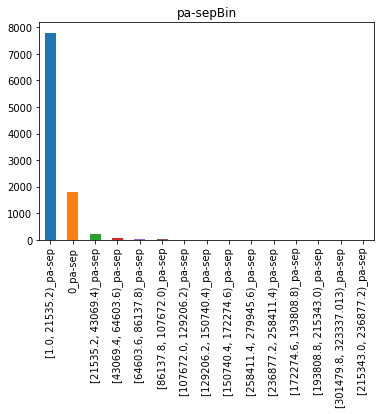

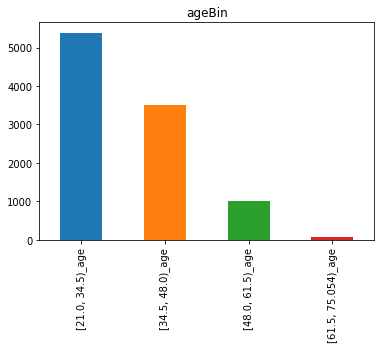

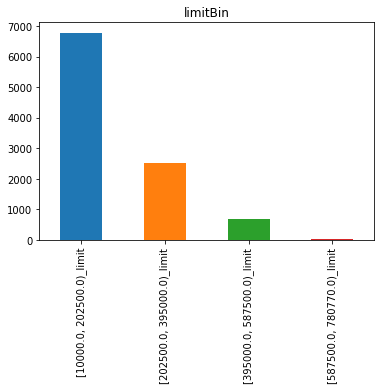

In [74]:
for i in data_bin.columns:
    fig, ax = plt.subplots()
    plt.title(i)
    data_bin[i].value_counts().plot(ax=ax, kind='bar')

# PS=-1
La frequenza del ps=-1 in ogni mese è al più 2000

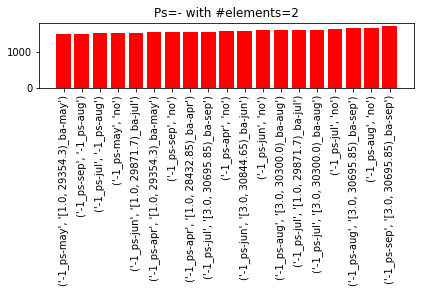

In [23]:
# 2 --> numero minimo di item
# a --> 'all'
# 15 --> min_sup
pat=freq[2]['a'][15]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if(any("-1_ps-" in s for s in f_p) and not(any("pa" in s for s in f_p))):
        credit.append(pat[i])
        
plot_freq(2,3, credit, 'Ps=- with #elements=')

# PS=0
La frequenza del ps=0 in ogni mese è intorno a 5000
- Chi usa il riciclo, tende ad usarlo sempre [#elem=6]
- Chi tende ad usare il riciclo non va in default [#elem=6]

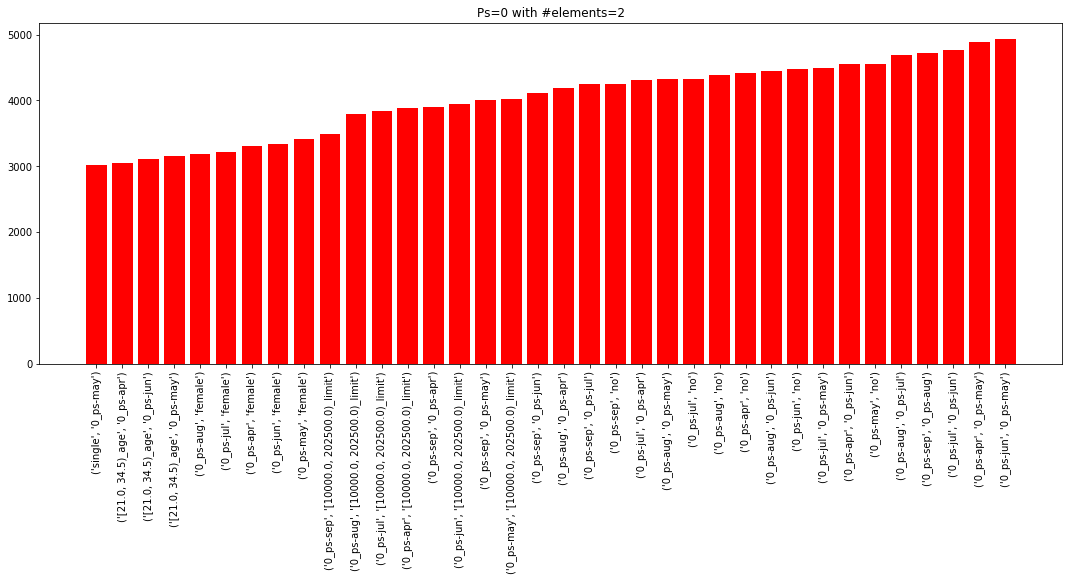

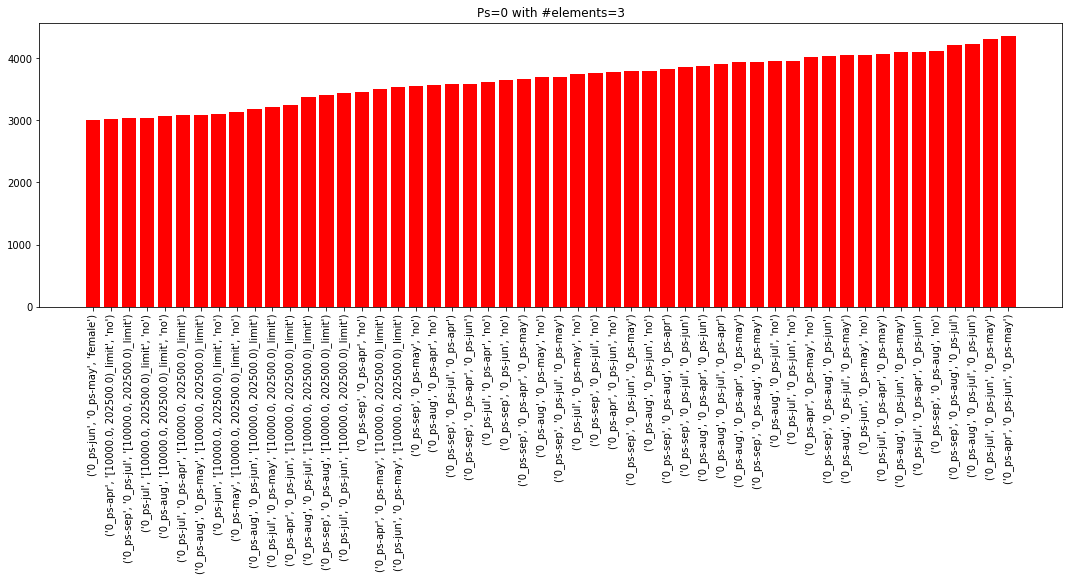

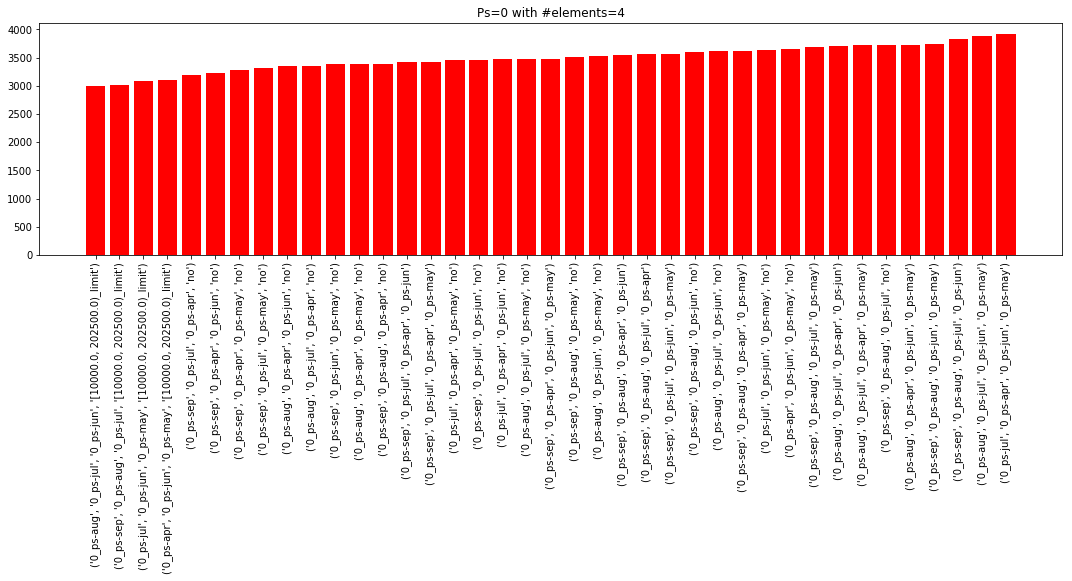

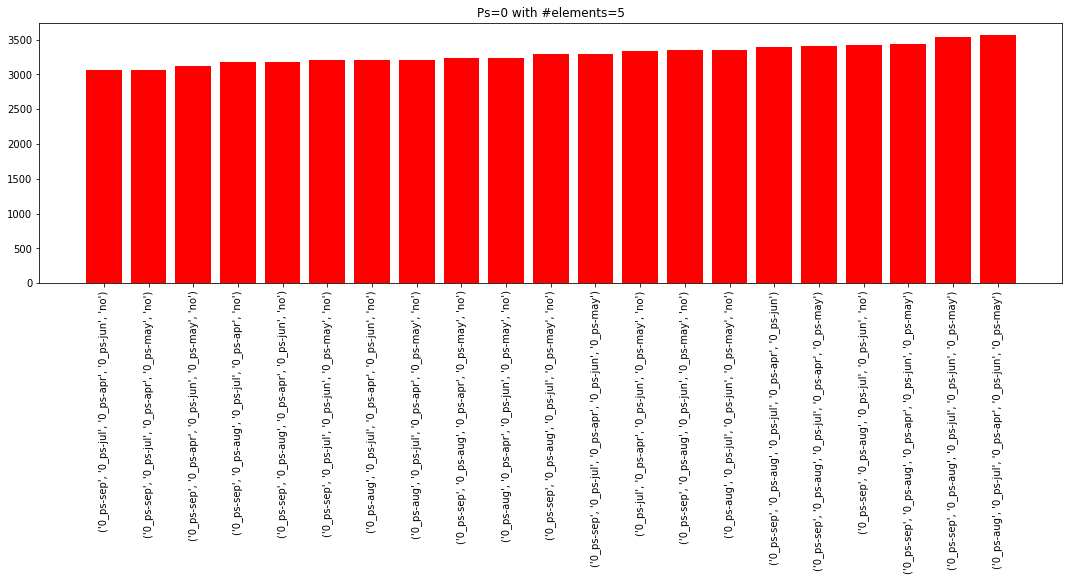

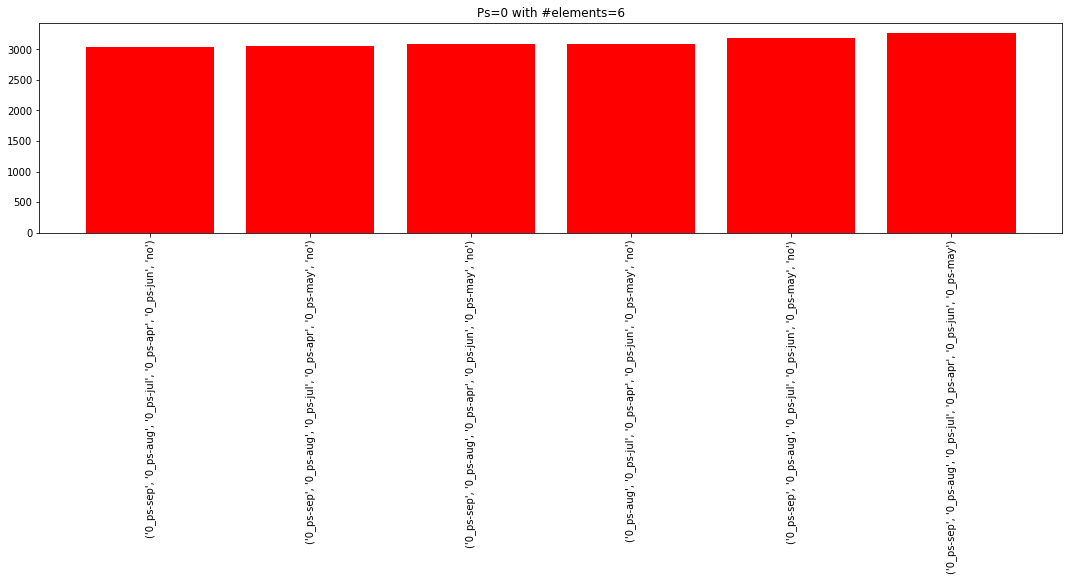

In [38]:
pat=freq[2]['a'][30]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if(any("0_ps-" in s for s in f_p) and not(any("pa" in s for s in f_p))):
        credit.append(pat[i])
        
plot_freq(2,7, credit, 'Ps=0 with #elements=',15,8)

# Read frequent pattern with min sup from 9 to 15

In [4]:
freq_9=pickle.load(open('freq_patt_dict_9_15.pkl','rb'))

In [5]:
freq_9.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Ps = -2
La frequenza del ps=-2 nei mesi è intorno a 1000
- credit default=no con non-consumption nei primi 3 mesi (apr,may,jun) [#elem=4]
- è molto frequente che chi non consuma, lo faccia per mesi consecutivi [#elem=5]

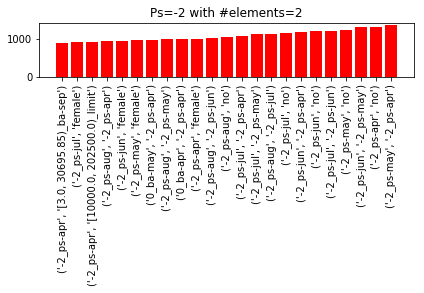

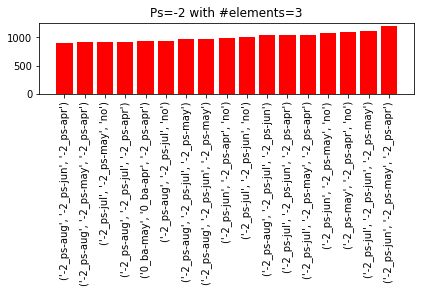

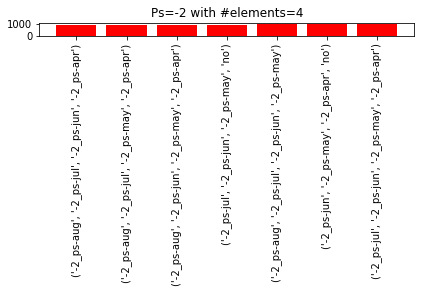

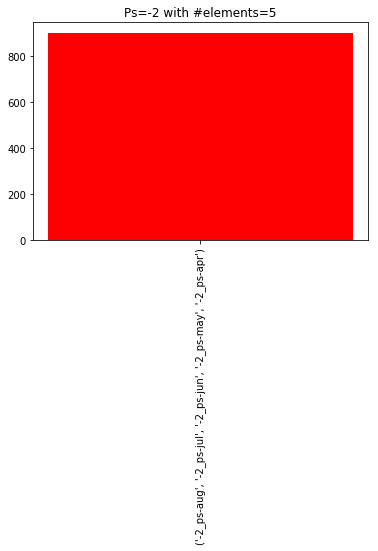

In [18]:
# 2 --> numero minimo di item
# a --> 'all'
# 15 --> min_sup
pat=freq_9[2]['a'][9]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if(any("-2_ps-" in s for s in f_p) and not(any("pa" in s for s in f_p))):
        credit.append(pat[i])
    
plot_freq(2,6, credit, 'Ps=-2 with #elements=')


# PS=1
ps=1 è presente con frequenza circa 1000 solo a settembre e agosto. Frequenza minima a luglio, inesistente negli altri mesi.

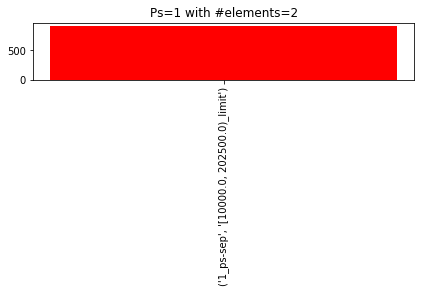

In [15]:
pat=freq_9[2]['a'][9]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if((any("1_ps-" in s for s in f_p)) and (not(any("pa" in s for s in f_p)))):
        if(not(any("-1_ps-" in s for s in f_p))):
            credit.append(pat[i])
    
plot_freq(2,3, credit, 'Ps=1 with #elements=')


# PS=2
La frequenza del ps=2 nei mesi è circa 1000

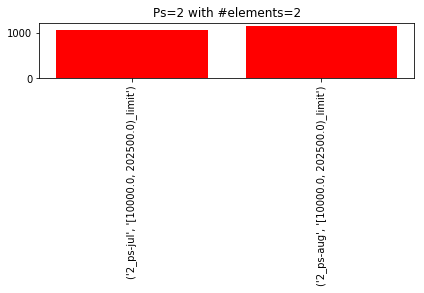

In [13]:
pat=freq_9[2]['a'][9]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if((any("2_ps-" in s for s in f_p)) and (not(any("pa" in s for s in f_p)))):
        if(not(any("-2_ps-" in s for s in f_p))):
            credit.append(pat[i])
    
plot_freq(2,3, credit, 'Ps=2 with #elements=')


# Credit default = yes
In totale ci sono 2208 default=yes
- yes e age[21,34] [#elem=2]
- yes e limit basso [#elem=2]

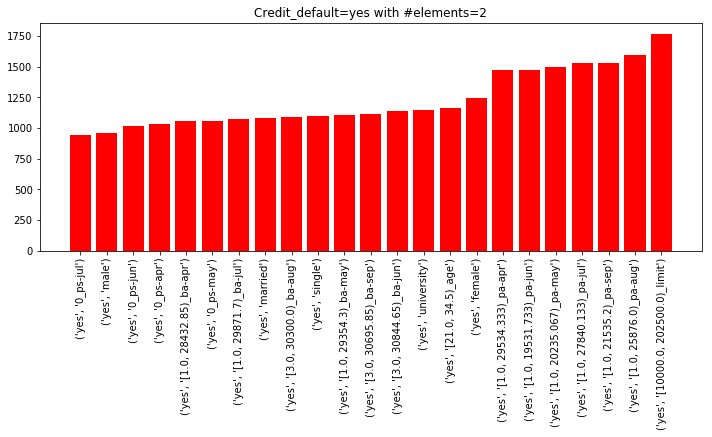

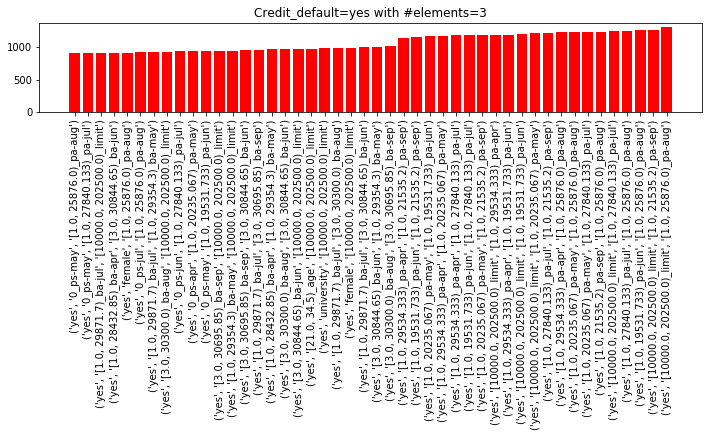

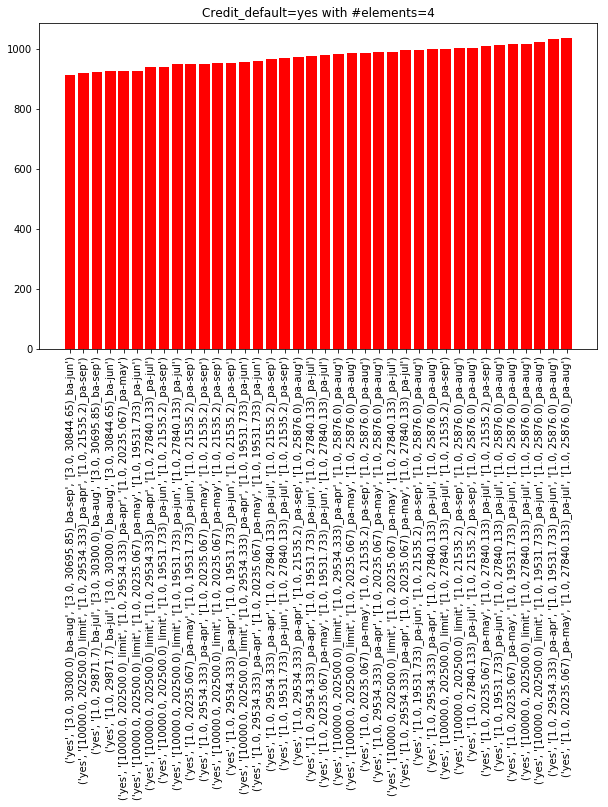

In [44]:
pat=freq_9[2]['a'][9]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if((any("yes" in s for s in f_p)) ):
        credit.append(pat[i])
    
plot_freq(2,5, credit, 'Credit_default=yes with #elements=')


# Credit default=no
In totale ci sono 7762 default=no

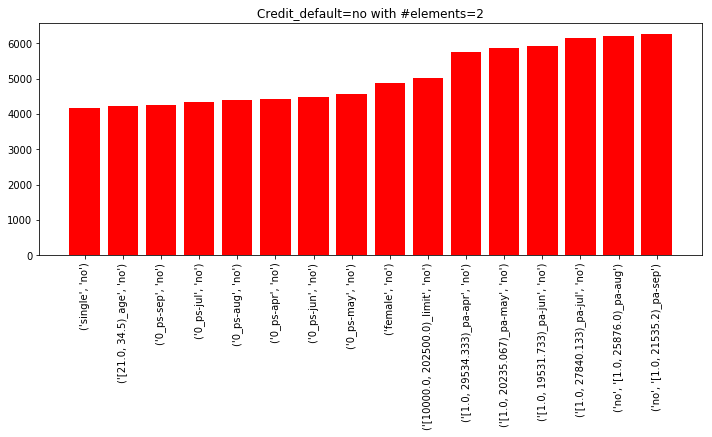

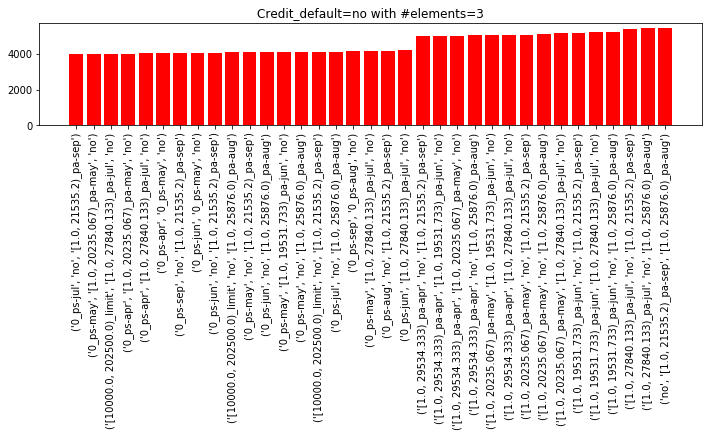

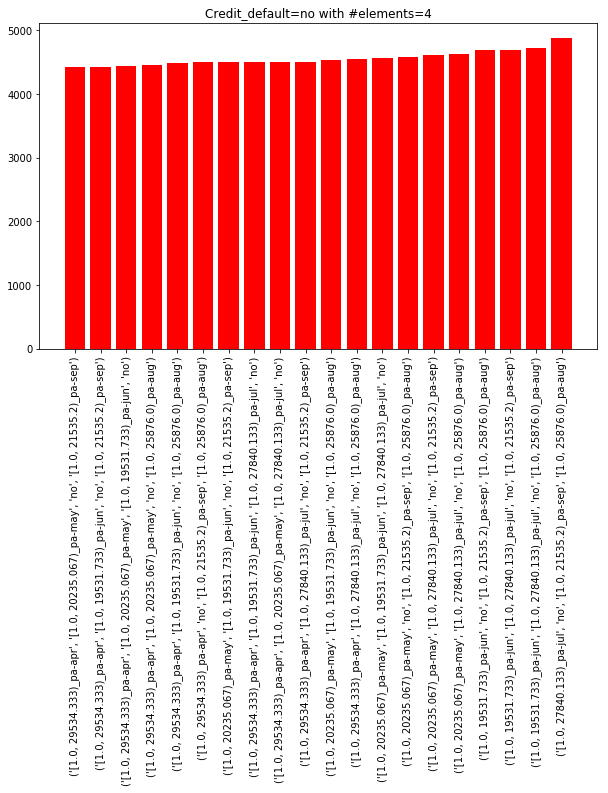

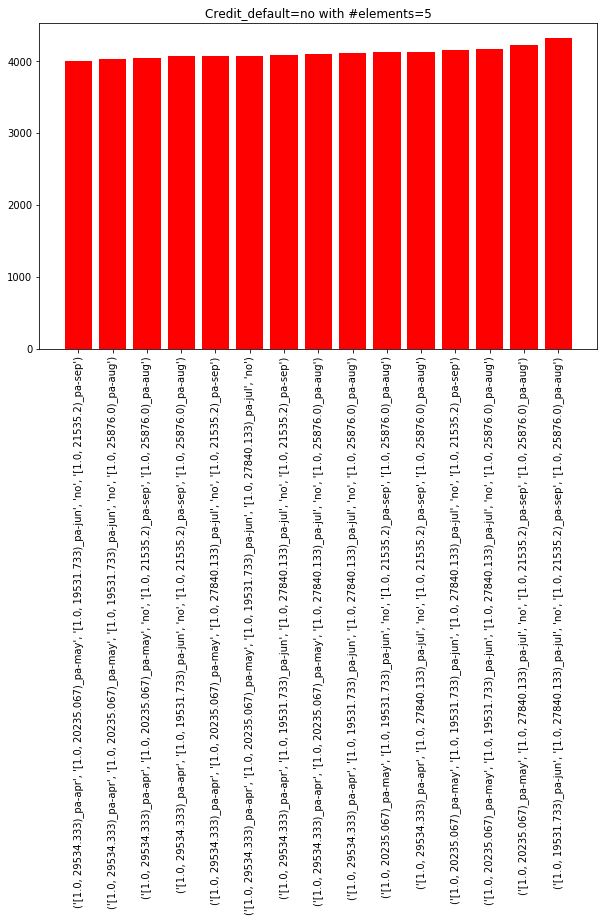

In [57]:
pat=freq[2]['a'][40]['itemsets']
credit=[]
for i in range(0,len(pat)):
    f_p=pat[i][0]
    if((any("no" in s for s in f_p)) ):
        credit.append(pat[i])
    
plot_freq(2,6, credit, 'Credit_default=no with #elements=')
